# Heart Disease Research

In this project, it will be investigated some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease) and then cleaned for analysis. The principal investigators responsible for data collection were:


1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.


## Import libraries

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Load data

The data has been saved as a dataframe named heart. It contains the following variables:


- **age**: age in years
- **sex**: sex assigned at birth; 'male' or 'female'
- **trestbps**: resting blood pressure in mm Hg
- **chol**: serum cholesterol in mg/dl
- **cp:** chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- **exang**: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- **fbs**: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- **thalach**: maximum heart rate achieved in exercise test
- **heart_disease**: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)


In [160]:
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


## Analyzing resting blood pressure (trestbps)

Is **thalach** associated with whether or not a patient will ultimately be diagnosed with heart disease?


- **Null**: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- **Alternative**: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.


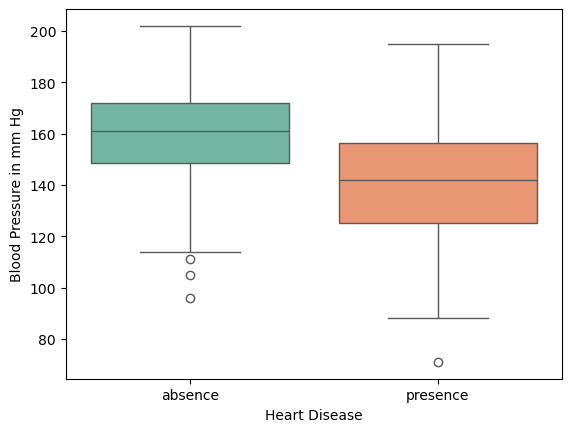

<Figure size 640x480 with 0 Axes>

In [161]:
sns.boxplot(data=heart, x="heart_disease", y="thalach", palette='Set2', hue="heart_disease")
plt.xlabel("Heart Disease")
plt.ylabel("Blood Pressure in mm Hg")
plt.show()
plt.clf()

In [162]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)

print(f"pval: {pval}")

pval: 3.456964908430172e-14


**Null hypothesis can be rejected because pval is less than 0.05 (threshold)**. Meaning that there is a significant difference in average thalach for a person with and without heart disease.

Is **thalach** associated with chest pain type?


- **Null**: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- **Alternative**: Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

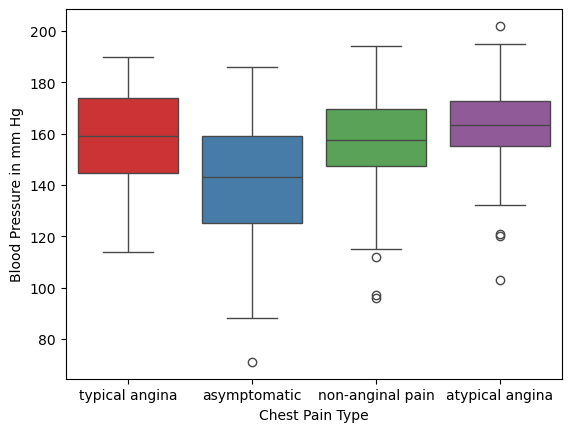

<Figure size 640x480 with 0 Axes>

In [163]:
sns.boxplot(data=heart, x="cp", y="thalach", hue="cp", palette='Set1')
plt.xlabel("Chest Pain Type")
plt.ylabel("Blood Pressure in mm Hg")
plt.show()
plt.clf()

In [164]:
thalach_typical = heart[heart["cp"] == "typical angina"]["thalach"]
thalach_asymptom = heart[heart["cp"] == "asymptomatic"]["thalach"]
thalach_nonangin = heart[heart["cp"] == "non-anginal pain"]["thalach"]
thalach_atypical = heart[heart["cp"] == "atypical angina"]["thalach"]

fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print(f"pval: {pval}")

pval: 1.9065505247705008e-10


Pval is less than 0.05. **At least one pair of groups earned significantly different blood pressure on average**.

In [165]:
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394    0.0  12.7442 30.7347   True
    asymptomatic non-anginal pain  14.7264    0.0   7.2583 22.1945   True
    asymptomatic   typical angina   15.276 0.0081   2.9707 27.5812   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7587  2.7327  False
 atypical angina   typical angina  -6.4635 0.6213 -20.2702  7.3432  False
non-anginal pain   typical angina   0.5495 0.9995 -12.3145 13.4136  False
-------------------------------------------------------------------------


People with those chest pain types have significantly different maximum heart rates during exercise. **Surprisingly, people who are 'asymptomatic' seem to have a lower maximum heart rate (associated with heart disease) than people who have other kinds of chest pain**. Let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease.


- **Null**: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- **Alternative**: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.


In [166]:
table = pd.crosstab(heart.cp, heart.heart_disease)
chi2, pval, dof , expected = chi2_contingency(table)
print(f"pval= {pval}")
table

pval= 1.2517106007837527e-17


heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


**People with asymptomatic chest pain tend to have a heart disease.**

## Analyzing age

Is **age** associated with whether or not a patient will ultimately be diagnosed with heart disease?


- **Null**: The average age for a person with heart disease is equal to the average age for a person without heart disease.
- **Alternative**: The average age for a person with heart disease is NOT equal to the average age for a person without heart disease.

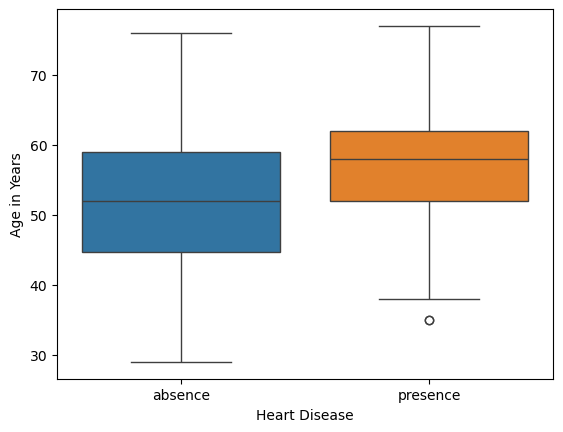

<Figure size 640x480 with 0 Axes>

In [167]:
sns.boxplot(data=heart, x="heart_disease", y="age", hue="heart_disease")
plt.xlabel("Heart Disease")
plt.ylabel("Age in Years")
plt.show()
plt.clf()

In [168]:
age_hd = heart[heart["heart_disease"] == "presence"]["age"]
age_no_hd = heart[heart["heart_disease"] == "absence"]["age"]
tstat, pval = ttest_ind(age_hd, age_no_hd)

print(f"pval: {pval}")

pval: 8.955636917529706e-05


**Null hypothesis can be rejected because pval is less than 0.05 (threshold)**. Meaning that there is a significant difference in average age for a person with and without heart disease.

## Analyzing serum cholesterol

Is **chol** associated with whether or not a patient will ultimately be diagnosed with heart disease?


- **Null**: The average chol for a person with heart disease is equal to the average chol for a person without heart disease.
- **Alternative**: The average chol for a person with heart disease is NOT equal to the average chol for a person without heart disease.

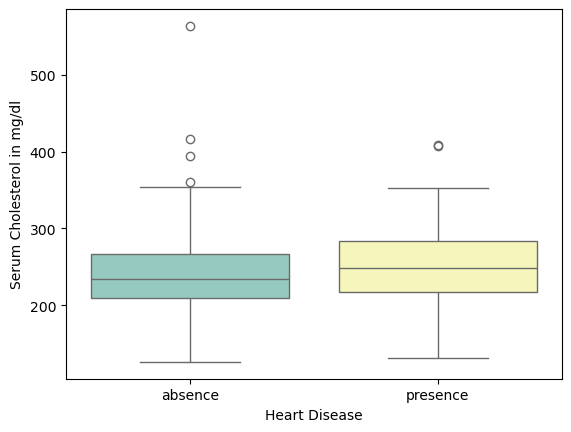

<Figure size 640x480 with 0 Axes>

In [169]:
sns.boxplot(data=heart, x="heart_disease", y="chol", hue="heart_disease", palette='Set3')
plt.xlabel("Heart Disease")
plt.ylabel("Serum Cholesterol in mg/dl")
plt.show()
plt.clf()

In [170]:
chol_hd = heart[heart["heart_disease"] == "presence"]["chol"]
chol_no_hd = heart[heart["heart_disease"] == "absence"]["chol"]
tstat, pval = ttest_ind(chol_hd, chol_no_hd)

print(f"pval: {pval}")

pval: 0.13914167020436527


**Null hypothesis cannot be rejected because pval is greater than 0.05 (threshold)**. Meaning that there is not a significant difference in average chol for a person with and without heart disease.